In [4]:
import pandas as pd
df=pd.read_csv(r"df_final_demo.txt")


In [5]:
part1=pd.read_csv(r"df_final_web_data_pt_1.txt")


In [6]:
part2=pd.read_csv(r"df_final_web_data_pt_2.txt")


In [7]:
df_concated=pd.concat([part1,part2], ignore_index=True)


In [8]:
Variation=pd.read_csv(r"df_final_experiment_clients.txt")


In [9]:
merged = pd.merge(df, df_concated, on='client_id', how='inner')

In [10]:
full_df = pd.merge(merged, Variation, on='client_id', how='inner')


In [11]:
full_df.shape

(449831, 14)

In [12]:
full_df=full_df.drop_duplicates()

In [13]:
full_df=full_df.dropna()

In [14]:
full_df.isna().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
visitor_id          0
visit_id            0
process_step        0
date_time           0
Variation           0
dtype: int64

In [15]:
primary_cilents=full_df.groupby('client_id').agg({'visit_id': 'count'}).sort_values(by='visit_id',ascending=False).head(10)
primary_cilents

,visit_id
client_id,
465007,72
9638063,71
4167815,61
2313292,61
5165430,60
2261960,59
7597144,58
5902055,57
843228,55


In [16]:
test_table=full_df[full_df['Variation'].str.lower() == 'test']
test_table

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,Test
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,Test
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Test
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,Test
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15,Test
321305,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51,Test
321306,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40,Test
321307,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11,Test


In [17]:
control_table = full_df[full_df['Variation'].str.lower() == 'control']
control_table

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,Variation
11,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16,Control
12,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53,Control
13,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04,Control
14,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31,Control
15,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321283,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55,Control
321284,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14,Control
321285,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29,Control
321286,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07,Control


In [18]:
test_table.duplicated().sum()

np.int64(0)

In [19]:
test_total = test_table['client_id'].nunique()
test_completed = test_table[test_table['process_step'] == 'confirm']['client_id'].nunique()
completion_rate_test = round(test_completed / test_total * 100, 2)
print(f"Completion Rate (Test): {completion_rate_test}%")


Completion Rate (Test): 69.29%


In [20]:
# Step 1: Identify completed clients
completed_clients = test_table[test_table["process_step"] == "confirm"]["client_id"].unique()

# Step 2: Flag each row as completed or not
test_table['completed_flag'] = test_table['client_id'].isin(completed_clients).map({True: 'yes', False: 'no'})


C:\Users\prodd\AppData\Local\Temp\ipykernel_19780\348719253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_table['completed_flag'] = test_table['client_id'].isin(completed_clients).map({True: 'yes', False: 'no'})


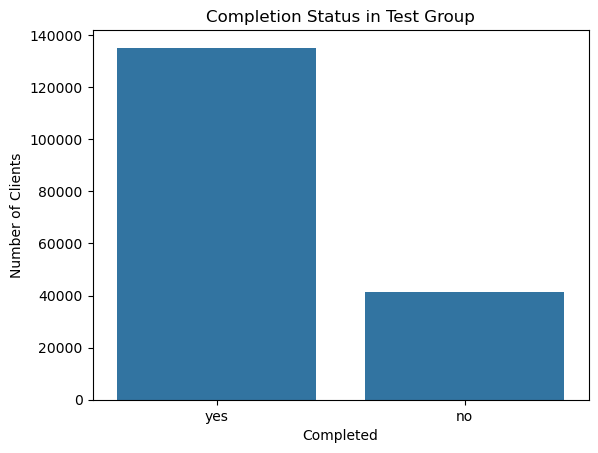

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='completed_flag', data=test_table)
plt.title("Completion Status in Test Group")
plt.xlabel("Completed")
plt.ylabel("Number of Clients")
plt.show()



In [22]:
control_total = control_table['client_id'].nunique()
control_completed = control_table[control_table['process_step'] == 'confirm']['client_id'].nunique()
completion_rate_control = round(control_completed / control_total * 100, 2)
print(f"Completion Rate (Control): {completion_rate_control}%")


Completion Rate (Control): 65.58%


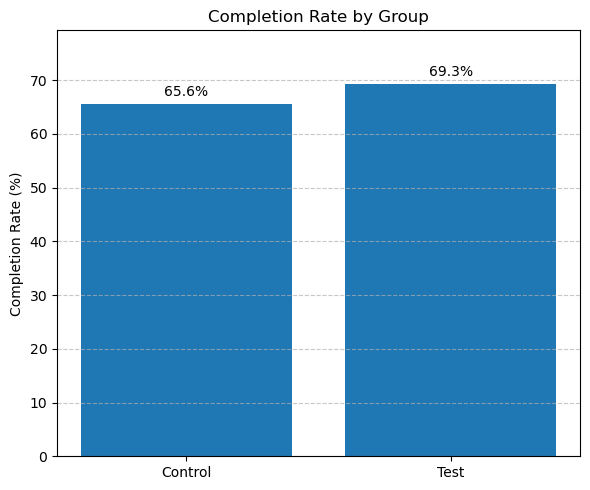

In [23]:

# Plotting
groups = ['Control', 'Test']
rates = [completion_rate_control, completion_rate_test]

plt.figure(figsize=(6, 5))
bars = plt.bar(groups, rates)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.title('Completion Rate by Group')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, max(rates) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
# Step 1: Identify completed clients
completed_clients = control_table[control_table["process_step"] == "confirm"]["client_id"].unique()

# Step 2: Flag each row as completed or not
control_table['completed_flag'] = control_table['client_id'].isin(completed_clients).map({True: 'yes', False: 'no'})


C:\Users\prodd\AppData\Local\Temp\ipykernel_19780\483522972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_table['completed_flag'] = control_table['client_id'].isin(completed_clients).map({True: 'yes', False: 'no'})


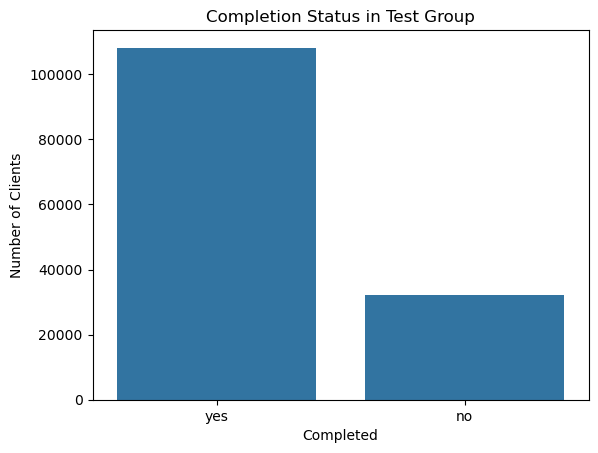

In [25]:
sns.countplot(x='completed_flag', data=control_table)
plt.title("Completion Status in Test Group")
plt.xlabel("Completed")
plt.ylabel("Number of Clients")
plt.show()

In [26]:
crosstab=pd.crosstab(test_table['process_step'], test_table['completed_flag'])


In [27]:
#chi_square
from scipy.stats import chi2_contingency
_,chi2_contingency,_,_=chi2_contingency(crosstab)
chi2_contingency

np.float64(0.0)

In [28]:
#person correlation
test_table['step_code'] = test_table['process_step'].astype('category').cat.codes
test_table['step_code'].corr(test_table['client_id'])

C:\Users\prodd\AppData\Local\Temp\ipykernel_19780\4185955481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_table['step_code'] = test_table['process_step'].astype('category').cat.codes


np.float64(0.002058637281933395)

In [29]:
#the process_step increaes the client_id increases

In [30]:
#p_T = Completion rate of the Test group
# p_C = Completion rate of the Control group
#H_0:
#p_T\leq p_C+0.05- The Test group is not sufficiently better than the Control group
#H_1:
#p_T>p_C+0.05- The Test group is significantly better — by at least 5


In [31]:
from statsmodels.stats.proportion import proportions_ztest

# Completion counts
completed_t = (test_table['process_step'] == 'confirm').sum()
total_t = test_table['client_id'].nunique()

completed_c = (control_table['process_step'] == 'confirm').sum()
total_c = control_table['client_id'].nunique()

# Completion rates
p_t = completed_t / total_t
p_c = completed_c / total_c
threshold = p_c + 0.05

# Adjusted null hypothesis: compare p_t to threshold
# Convert threshold to a count for z-test
adjusted_completed_c = threshold * total_c

# Run one-sided z-test
stat, pval = proportions_ztest([completed_t, adjusted_completed_c], [total_t, total_c], alternative='larger')

print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")


Z-statistic: 54.8595
P-value: 0.0000


In [32]:

#reject the null hypothesis 
#The completion rate for the Test group is significantly different from the Control group.-
# This is far below the standard significance threshold of 0.05, meaning the result is statistically significant
#The Test group’s completion rate is not only higher than the Control group, but exceeds it by more than 5%, making the new design cost-effective and performance-enhancing.



In [33]:
# Step 1: Copy and convert timestamp
test_table = test_table.copy()
test_table['date_time'] = pd.to_datetime(test_table['date_time'], errors='coerce')

# Step 2: Sort and calculate time spent
test_table = test_table.sort_values(by=['visit_id', 'date_time'])

# Step 3: Calculate time spent between steps
test_table['time_spent_minutes'] = (
    test_table.groupby('visit_id')['date_time']
    .diff()
    .dt.total_seconds() / 60
)

#diff() is difference between dates
#abs() convert -ve to +ve
#dt.total_seconds()/60 is to convert into minutes

In [34]:
mean = test_table['time_spent_minutes'].mean()
test_table['time_spent_minutes'].fillna(mean, inplace=True)
test_table['time_spent_minutes']=test_table['time_spent_minutes'].round(2)

C:\Users\prodd\AppData\Local\Temp\ipykernel_19780\2205890008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_table['time_spent_minutes'].fillna(mean, inplace=True)


In [35]:
Q1 = test_table['time_spent_minutes'].quantile(0.25)
Q3 = test_table['time_spent_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

test_table = test_table[(test_table['time_spent_minutes'] >= lower_bound) & (test_table['time_spent_minutes'] <= upper_bound)]

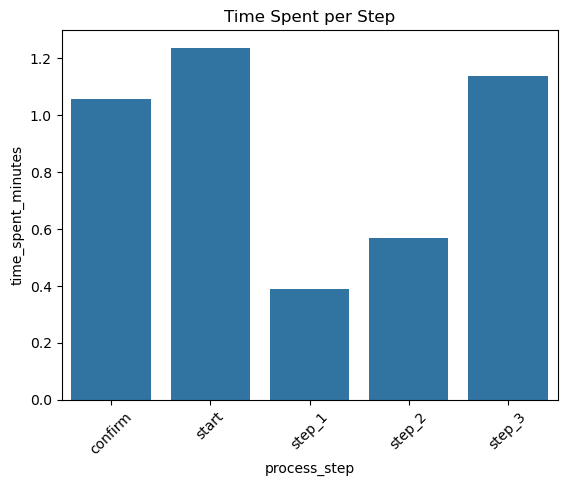

In [36]:
sns.barplot(x='process_step', y='time_spent_minutes', data=test_table,errorbar=None)
plt.title("Time Spent per Step")
plt.xticks(rotation=45)
plt.show()


In [37]:
test_table.groupby('process_step')['time_spent_minutes'].mean()
#. Average Time per Step

process_step
confirm    1.056759
start      1.236043
step_1     0.388436
step_2     0.568043
step_3     1.135343
Name: time_spent_minutes, dtype: float64

In [38]:

# Make a clean copy
control_table = control_table.copy()

# Step 2: Convert date_time in test_table, not merged
control_table['date_time'] = pd.to_datetime(control_table['date_time'], errors='coerce')

# Step 3: Sort and calculate time spent
sorted_control = control_table.sort_values(by=['visit_id', 'date_time','client_id'])

control_table['time_spent_minutes'] = (
    sorted_control.groupby('visit_id')['date_time']
    .diff()
    .abs()
    .dt.total_seconds() / 60
)

In [39]:
control_table.groupby('visit_id')['time_spent_minutes'].sum()
# Total Time per Visit

visit_id
100030127_47967100085_936361     0.000000
100037962_47432393712_705583     2.200000
100057941_88477660212_944512     4.233333
10006594_66157970412_679648      5.900000
100071743_53464757454_616703     0.000000
                                  ...    
999859408_41720215615_938916     5.716667
999890184_77121766521_746360    11.333333
999936732_27995195904_324897     1.066667
999951892_54774917180_163890     0.000000
999985675_64610694964_443659    17.500000
Name: time_spent_minutes, Length: 32181, dtype: float64

In [40]:
control_table.groupby('process_step')['time_spent_minutes'].mean()
#. Average Time per Step

process_step
confirm    2.165985
start      2.924452
step_1     0.719770
step_2     0.647403
step_3     1.569501
Name: time_spent_minutes, dtype: float64

In [41]:
mean = control_table['time_spent_minutes'].mean()
control_table['time_spent_minutes'].fillna(mean, inplace=True)
control_table['time_spent_minutes']=control_table['time_spent_minutes'].round(2)

C:\Users\prodd\AppData\Local\Temp\ipykernel_19780\4207991998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  control_table['time_spent_minutes'].fillna(mean, inplace=True)


In [42]:
Q1 = control_table['time_spent_minutes'].quantile(0.25)
Q3 = control_table['time_spent_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
control_table= control_table[(control_table['time_spent_minutes'] >= lower_bound) & (control_table['time_spent_minutes'] <= upper_bound)]

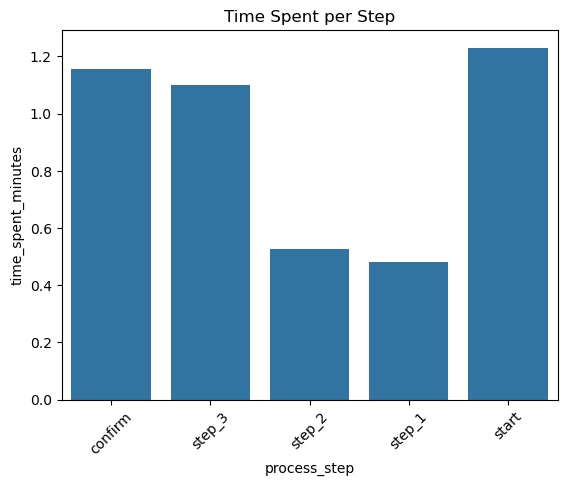

In [43]:
sns.barplot(x='process_step', y='time_spent_minutes', data=control_table,errorbar=None)
plt.title("Time Spent per Step")
plt.xticks(rotation=45)
plt.show()

In [44]:
c=pd.crosstab(test_table["process_step"],test_table["time_spent_minutes"])

In [45]:
#chi_square
from scipy.stats import chi2_contingency
_,chi2_contingency,_,_=chi2_contingency(c)
chi2_contingency

np.float64(0.0)

In [46]:
#cramers method
from scipy.stats.contingency  import association
association(c,method="cramer")

0.4535725767040233

In [47]:
#very weak association and also strength of association is weak between process step and time spent minutes.

In [48]:
#correlation pearson
#converting into numeric codes
test_table['step_code'] = test_table['process_step'].astype('category').cat.codes
test_table['step_code'].corr(test_table['time_spent_minutes'])


np.float64(-0.16916971889900742)

In [49]:
#spearman
test_table['step_code'].corr(test_table['time_spent_minutes'],method="spearman")

np.float64(-0.2405085759057902)

In [50]:
#higher step codes, tend to spend slightly less time per step.

In [51]:
# H₀: Mean time spent in test group <= mean time spent in control group

#H₁: Mean time spent in test group >= mean time spent in control group
#0.05

In [52]:
from scipy.stats import ttest_ind
#step-start
test_times = test_table[test_table["process_step"] == 'start']["time_spent_minutes"].dropna()
control_times = control_table[control_table["process_step"] == 'start']["time_spent_minutes"].dropna()

ttest_ind(test_times, control_times,alternative = "greater")


TtestResult(statistic=np.float64(1.5321074747145806), pvalue=np.float64(0.06274965512051943), df=np.float64(93185.0))

In [53]:
from scipy.stats import ttest_ind

steps = test_table['process_step'].dropna().unique()

for step in steps:
    test_times = test_table[test_table['process_step'] == step]['time_spent_minutes'].dropna()
    control_times = control_table[control_table['process_step'] == step]['time_spent_minutes'].dropna()
    stat, p_value = ttest_ind(test_times, control_times, alternative = "greater")
    print(f"Step: {step}")
    print(f"  p-value: {p_value}")


Step: confirm
  p-value: 1.0
Step: start
  p-value: 0.06274965512051943
Step: step_1
  p-value: 1.0
Step: step_2
  p-value: 7.387174403568427e-21
Step: step_3
  p-value: 1.4447243422480512e-07


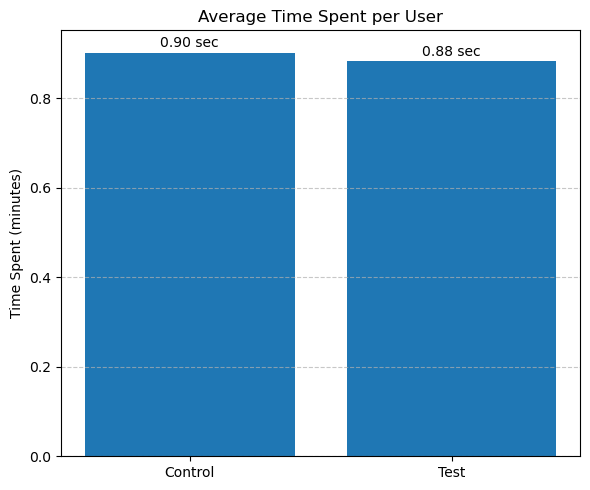

In [54]:
import matplotlib.pyplot as plt

# Time spent in minutes
mean_test = 0.883
mean_control = 0.902
groups = ['Control', 'Test']
times = [mean_control, mean_test]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(groups, times)

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f} sec', ha='center', va='bottom')

plt.title('Average Time Spent per User')
plt.ylabel('Time Spent (minutes)')
plt.ylim(0, max(times) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
#rejected H0 and  test group spent more time


In [56]:
def calculate_error_rate(df):
    # Step order mapping
    step_order = {
        'start': 1,
        'step_1': 2,
        'step_2': 3,
        'step_3': 4,
        'confirm': 5
    }

    # Copy and prepare
    df = df.copy()
    df['step_num'] = df['process_step'].map(step_order)
    df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
    df = df.sort_values(by=['visit_id', 'date_time'])

    # Calculate step movement
    df['step_diff'] = df.groupby('visit_id')['step_num'].diff()
    df['is_error'] = df['step_diff'] < 0

    # Compute error rate
    total_steps = df['step_diff'].count()
    error_steps = df['is_error'].sum()
    error_rate = round(error_steps / total_steps * 100, 2)

    return error_rate


In [57]:
error_rate_test = calculate_error_rate(test_table)
error_rate_control = calculate_error_rate(control_table)

print(f"Error Rate (Test Group): {error_rate_test}%")
print(f"Error Rate (Control Group): {error_rate_control}%")


Error Rate (Test Group): 10.78%
Error Rate (Control Group): 8.5%


In [58]:
# Build per-client error rates and run a Two-Sample (Independent) T-Test on means
step_order = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4,
    'confirm': 5
}

def individual_error_rate(df, step_order):
    df = df.replace({'process_step': step_order})
    df = df.sort_values(['client_id', 'visit_id', 'date_time'])
    df['prev_step'] = df.groupby(['client_id', 'visit_id'])['process_step'].shift()
    df['backward_move'] = df['process_step'] < df['prev_step']
    return df.groupby('client_id')['backward_move'].mean().reset_index(name='error_rate')
test_individual = individual_error_rate(test_table, step_order)
control_individual = individual_error_rate(control_table, step_order)

C:\Users\prodd\AppData\Local\Temp\ipykernel_19780\790459508.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'process_step': step_order})
C:\Users\prodd\AppData\Local\Temp\ipykernel_19780\790459508.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'process_step': step_order})


In [65]:
test_individual["error_rate"].mean()

np.float64(0.05643325281091958)

In [66]:
control_individual["error_rate"].mean()

np.float64(0.04092501840612674)

In [60]:
#Two-proportion z-test


from scipy.stats import ttest_ind


test_errors = test_individual['error_rate'].dropna()
control_errors = control_individual['error_rate'].dropna()

stat, pval = ttest_ind(test_errors, control_errors, equal_var=False)
pval

np.float64(1.6181357101266604e-80)

In [61]:
# If p-value < 0.05, reject H₀ → The mean error rate of the Test and Control groups are the same.

# If p-value ≥ 0.05, fail to reject H₀ → Fail to reject H₀: The mean error rate of the Test group is different than the Control group.

In [62]:
#h0 reject 

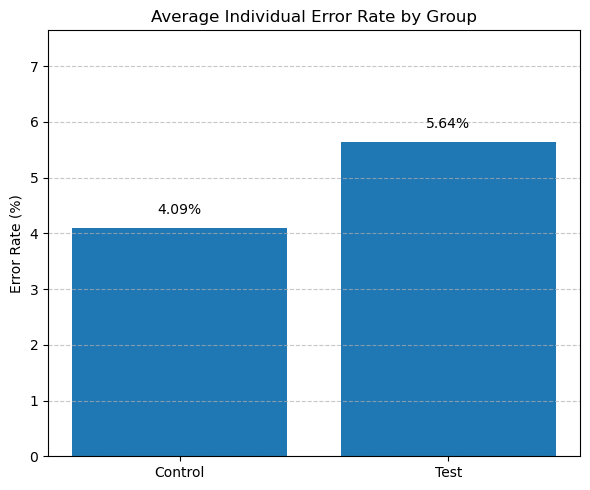

In [71]:
import matplotlib.pyplot as plt

# Error rates in percentage
error_test = 5.64
error_control = 4.09
groups = ['Control', 'Test']
errors = [error_control, error_test]

# Plotting
plt.figure(figsize=(6, 5))
bars = plt.bar(groups, errors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Average Individual Error Rate by Group')
plt.ylabel('Error Rate (%)')
plt.ylim(0, max(errors) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()